In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('../data/train.csv')

# Display the first few rows to check
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "../data/train.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Check the path.")

df = pd.read_csv(file_path)

# Ensure target column exists
target_column = "SalePrice"
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset.")

# Handle missing values: Fill categorical with mode, numerical with median
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].median(), inplace=True)

# Separate features and target
X, y = df.drop(columns=[target_column]), df[target_column]

# Encode categorical features
label_encoders = {col: LabelEncoder().fit(X[col]) for col in X.select_dtypes(include=['object'])}
for col, encoder in label_encoders.items():
    X[col] = encoder.transform(X[col])

# Ensure data validity
if X.empty or y.empty:
    raise ValueError("Dataset is empty after preprocessing. Check data!")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")






Training Data Shape: (1168, 80)
Testing Data Shape: (292, 80)


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Suppress FutureWarnings

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, r2_score

# Ensure categorical features are handled properly (convert to category dtype)
for col in X.select_dtypes(include=["object"]).columns:
    X[col] = X[col].astype("category")

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    }
    print(f"{name} -> MAE: {results[name]['MAE']:.4f}, R²: {results[name]['R²']:.4f}")



Linear Regression -> MAE: 21598.3969, R²: 0.8371
Random Forest -> MAE: 17851.9400, R²: 0.8903
XGBoost -> MAE: 17282.3421, R²: 0.9031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3364
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 181441.541952


c:\Users\jinno\OneDrive\Documents\vscode-projects\Predicting-Housing-Prices\.venv\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\jinno\OneDrive\Documents\vscode-projects\Predicting-Housing-Prices\.venv\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\jinno\OneDrive\Documents\vscode-projects\Predicting-Housing-Prices\.venv\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\jinno\OneDrive\Documents\vscode-projects\Predicting-Housing-Prices\.venv\Lib\site-packages\xgboost\data.

LightGBM -> MAE: 16525.5343, R²: 0.8913


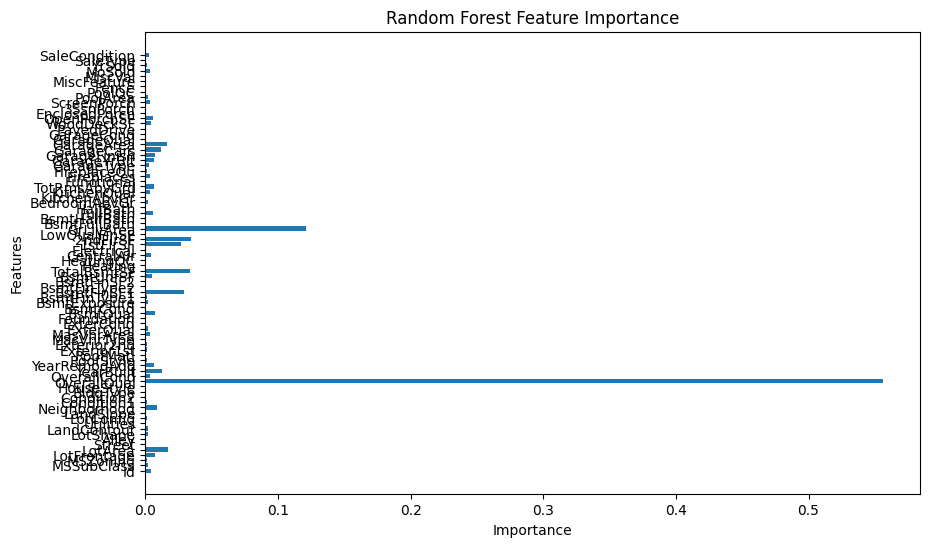

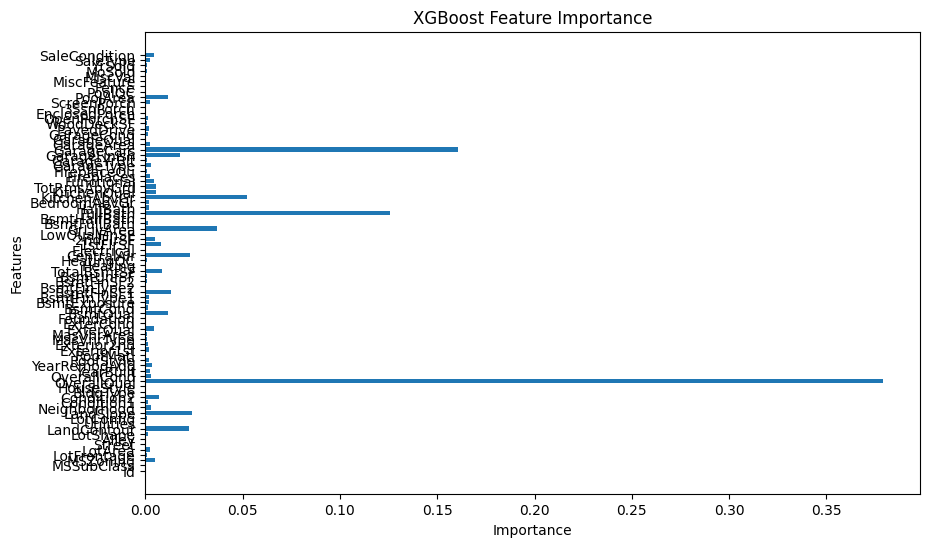

In [4]:
import matplotlib.pyplot as plt

# Retrieve trained models
random_forest = models["Random Forest"]
xgboost = models["XGBoost"]

# Plot function for feature importance
def plot_feature_importance(model, title):
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, model.feature_importances_)
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

# Plot feature importance for Random Forest and XGBoost
plot_feature_importance(random_forest, "Random Forest Feature Importance")
plot_feature_importance(xgboost, "XGBoost Feature Importance")



In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20]
}

# Optimize Random Forest
grid_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid, n_iter=4, cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1, random_state=42
)

grid_rf.fit(X_train, y_train)

# Display best parameters and MAE
print("Best Params:", grid_rf.best_params_)
print("Best MAE:", -grid_rf.best_score_)


Best Params: {'n_estimators': 100, 'max_depth': 20}
Best MAE: 17903.374529814424


In [6]:
# Use best Random Forest model
final_model = grid_rf.best_estimator_

# Evaluate final model
y_pred_final = final_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print(f"Final Model MAE: {final_mae:.4f}, R²: {final_r2:.4f}")


Final Model MAE: 17764.5145, R²: 0.8912
